# Ladybird Analysis 2

# Compare the mean sizes of melanic and non-melanic ladybird populations

<div class="alert alert-success">

# Part 1: Exploring your data
</div>

## Task 1.1: If you don't have your group's ladybird excel spreadsheet on Noteable, upload it now

Follow these instructions to do this:

1. Click Upload on the righthand side. 
2. Find your spreadsheet on your laptop and Open it for upload. 
3. In Noteable, click the blue Upload button to finish the upload. 

<div class="alert alert-danger">

Make sure that your excel spreadsheet is in the **Ladybird Analysis Notebooks** folder on Noteable, i.e., the same folder that this jupyter notebook is in.
    
</div>

## Task 1.2: Read in and print the data to check it is okay

1. Read in your excel spreadsheet using the command 
```python
pd.read_excel('spreadsheet.xlsx')
```
**Make sure to replace "spreadsheet.xlsx" with whatever your spreadsheet is called otherwise you'll get a FileNotFound error.**

2. Call the DataFrame something sensible, such as `ladybirds`.

3. Print the data to make sure it is okay.

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# read and print your ladybird size dataset

ladybirds = pd.read_csv("morningside.csv")
print(ladybirds)

    melanic  Non-melanic
0      6.50         7.00
1      7.50         7.25
2      8.25         6.50
3      6.75         6.50
4      6.00         7.00
5      7.00         8.00
6      7.00         7.50
7      7.00         7.50
8      9.00         7.00
9      6.00         6.00
10     6.50         7.00
11     9.00         6.50
12     7.50         7.00
13     8.00         8.00
14     8.00         7.50
15     7.50         7.50
16     7.50         7.00
17     6.00         7.00
18     6.00         7.00
19     7.00         7.00
20     6.00         6.00
21      NaN         6.50


## Task 1.3: Plot the samples in a histogram to see how they are distributed

Plot the distributions of the melanic and non-melanic ladybird sizes as histograms in a single annotated graph. 

See [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#First-plot-the-data) for help.

<div class="alert alert-success">

Note: The command 
    
```python
g = sns.displot( dataframe )
```
will plot a histogram for each column in dataframe. 
    
Whereas the command 
    
```python
g = sns.displot( dataframe['column_name'] )
```
    
will plot only a single histogram of the data in the column called `column_name`.
     
</div>

Text(0.5, 9.444444444444438, 'body length')

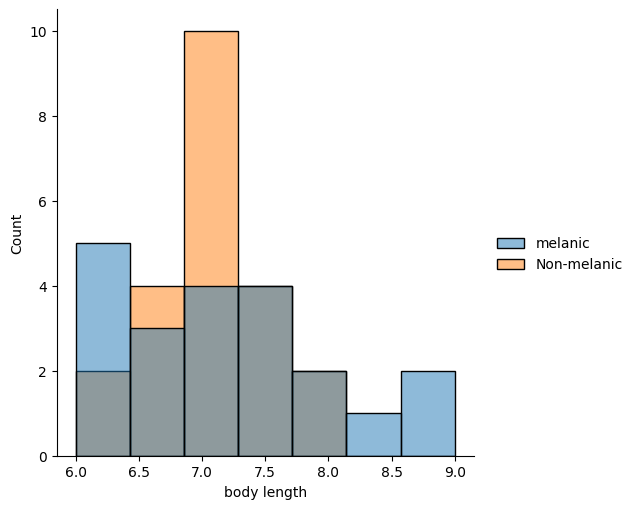

In [3]:
# annotated histograms of melanic and non-melanic ladybird sizes
f = sns.displot(ladybirds)
f.ax.set_xlabel("body length")

In [8]:
f.savefig("fig.png")

## Task 1.4: The distributions might be clearer in a boxplot

Your melanic and non-melanic histograms will probably overlap quite a lot. This makes it hard to see if the means of the two samples are different.

If that is the case, a boxplot is probably a better way to visualise your data as it hides individual data points and instead uses a 5-number-summary to summarise the distribution of your samples. 

Plot the distributions of ladybird sizes in an annotated boxplot.

See [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#First-plot-the-data) for help.

Text(0, 0.5, 'body size')

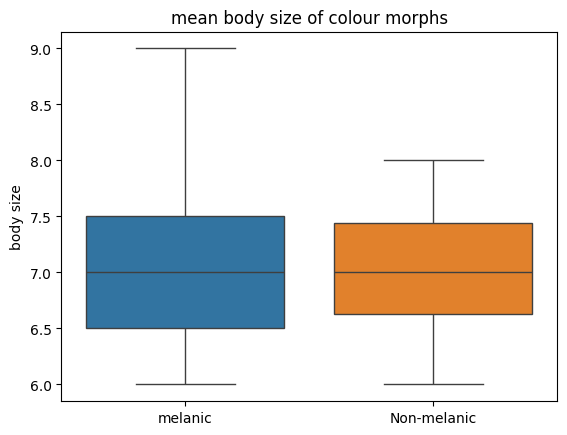

In [12]:
# a boxplot to visually compare ladybird sizes
g = sns.boxplot(ladybirds)
g.set_title("mean body size of colour morphs")
g.set_ylabel("body size")

In [13]:
g.savefig("gig2.png")

AttributeError: 'Axes' object has no attribute 'savefig'

## Task 1.5: What does the box and the various lines in a boxplot represent?

If you don't know try googling the answer. Write your answer in the following markdown cell.

> Write your answer here. 

minimum | 1st quartile | median | 3rd quartile | maximum

## Task 1.6: Eye-ball estimates of the means and standard deviations

It is generally a good idea to estimate means and standard deviations by eye before calculating them on a computer. This is so you can check your eye-ball estimates with the actual values output by Python. If they don't match then you know something is wrong: either your estimates or your code.

Using your histograms or boxplots, estimate the means and standard deviations of melanic and non-melanic ladybird sizes. Remember that a rough estimate of the standard deviation is given by this formula

$$s \approx \frac{\mathrm{max\ value} - \mathrm{min\ value}}{4}$$


> Write your estimates here

melanic:
- mean: 7 mm
- SD: 0.75 mm

non-melanic
- mean: 7
- SD: 0.5 mm

## Task 1.7: Calculate the sample sizes, sample means and sample standard deviations


Now, using Python code, calculate the sample sizes, means and standard deviations of the two samples and print to the appropriate number of decimal places.

See Notebook [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#Sample-means-and-standard-deviations) for example code.

How do they compare to your eye-ball estimates?

In [5]:
# sample sizes, sample means and sample standard deviations of both samples
melanic = {
    "mean": ladybirds["melanic"].mean(),
    "std": ladybirds["melanic"].std()
}

non_melanic = {
    "mean": ladybirds["Non-melanic"].mean(),
    "std": ladybirds["Non-melanic"].std()
}

print(melanic)
print(non_melanic)

{'mean': np.float64(7.142857142857143), 'std': np.float64(0.940649471679769)}
{'mean': np.float64(7.011363636363637), 'std': np.float64(0.5371733377646314)}


## Task 1.8: Calculate the difference in the sample means

Using the sample means you just calculated, calculate, using Python code, the difference in sample means. 

See Notebook [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#Sample-means-and-standard-deviations) for the code to do this.

In [6]:
# calculate your observed difference in sample means
diff = abs(melanic["mean"] - non_melanic["mean"])
print(diff)

0.13149350649350655


<div class="alert alert-success">

# Part 2: Two-sample *t*-test
</div>

Having looked at your data and calculated the difference in the sample means, you next need to work out how likely that difference is assuming the null hypothesis were true.

If that difference is **likely** under the null hypothesis then you have insufficient evidence to reject the null hypothesis.

On the other hand, if that difference is **unlikely** under the null hypothesis then you have sufficient evidence to reject the null hypothesis. 

How likely the observed difference in sample means is under the null hypothesis is called a *p*-value. 

This is what you are going to calculate now.

## Task 2.1: Perform a two-sample *t*-test

Perform a two-sample *t*-test on your data using Python code. To do this, copy, paste and adapt the code from [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#The-two-sample-t-test).

In [7]:
# perform a two-sample t-test on your data
import scipy.stats

t, p = scipy.stats.ttest_ind(ladybirds["melanic"], ladybirds["Non-melanic"], nan_policy="omit")

print("t:", t)
print("p:", p)

t: 0.5662334681421597
p: 0.5743215947174048


## Task 2.2: Reject or not reject your null hypothesis

Based on your *p*-value, do you reject, or fail to reject, your null hypothesis that mean ladybird sizes are the same in melanic and non-melanic two-spot ladybirds? Write your answer below.

Also see [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#To-reject-or-not-reject-the-null-hypothesis) for more discussion about rejecting or not rejecting a null hypothesis.

> Do you reject or not reject the null hypothesis? Explain why.

Nope, cuz p > 0.05 (by a lot)

## Task 2.3: Report the result of your test

There are three possible outcomes of your analysis.

1. You fail to reject the null hypothesis. Which means you have no evidence that mean sizes differ between melanic and non-melanic two-spot ladybirds.

2. You reject the null hypothesis, but melanic ladybirds are smaller than non-melanic ladybirds on average. Although you have found a significant difference it is the opposite to what we expected of our biological hypothesis.

3. You reject the null hypothesis, and melanic ladybirds are larger than non-melanic ladybirds on average. You have found a significant difference and it is consistent with the biological hypothesis.

Report the outcome of your test in words, as you might write in a report.

See [4.1 - Comparing two population means](../Self-study%20Notebooks/4.1%20-%20Comparing%20two%20population%20means.ipynb#Reporting-the-result-of-the-test) for an example. 

> Report the outcome of your test.

The body length of melanic and non-melanic harlequin ladybirds are measured. A non-significant difference of 0.1 mm was found between melanic and non-melanic colourmorphs (t = 0.56, p = 0.57). This evidence does not support the hypothesis that there is a size difference between colourmorphs of harlequin ladybirds.